/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[[3312   36]
 [ 200 2951]]


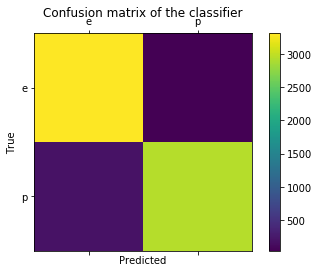

In [5]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pylab as plt
from FinalID3 import *
################################################################################################################
############################ Global Initialization #############################################################
targetAttribute = 'Poisonous/Edible'
targetValue = []
predictedList= []
# maxGainAttr:  spore-print-color    if  maxInfoGain > 0.144354902043, we get the data classified incorrectly
minimalGainThreshold =0.144
defaultTargetValue = 'p'
rawDataSet = 'MushroomDataSet_Before_PreProcessing.xlsx'
processedDataSet = 'MushroomDataSet_After_PreProcessing.xlsx'
columnToProcess = 'stalk-root'
res = {}
rfTargetValue = []
numberOfTrees = 500
###################################################################################################################
###################################################################################################################
datasetAfterProcessing = pd.read_excel(processedDataSet)
X = datasetAfterProcessing.drop(labels=targetAttribute, axis=1)
y = datasetAfterProcessing[targetAttribute]
#X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)
for i in range(numberOfTrees):
    random_state = random.randint(0,10)
    X_train_rf,X_test_rf,Y_train_rf,Y_test_rf = train_test_split(X,y,test_size = 0.2 ,random_state = random_state)
    X_train_rf[targetAttribute] = Y_train_rf
    targetValue = initializeList(X_train_rf)
    targetDict = createTree(X_train_rf)
    rfTargetValue.append(targetDict)
for i in list(range(0,len(X_train_rf))):
    predictedVal = predictTarget(targetDict,X_train_rf.iloc[[i]])
    predictedList.append(predictedVal)

printMatrix(Y_train_rf ,predictedList,list(targetValue))